In [ ]:
# The embedded fish sanity check!

In [128]:
import datetime
import h5py
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import tables
from tqdm import tqdm
%matplotlib inline
import random
import math
pd.set_option('display.max_columns', None)

pd.options.mode.chained_assignment = None  # default='warn'

In [25]:
df = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\temp_4dir\2022-12-14_20-14-08_setup0_arena0\2022-12-14_20-14-08_setup0_arena0.hdf5")
df.reset_index(inplace = True)
print('done all data')

done all data


In [71]:
f = h5py.File(r"C:\Users\ag-bahl\Desktop\temp_4dir\2022-12-14_20-14-08_setup0_arena0\2022-12-14_20-14-08_setup0_arena0.hdf5", 'r')
list(f.keys())

['experiment_configuration', 'repeat00']

In [72]:
dset = f['repeat00']
dset

<HDF5 group "/repeat00" (4 members)>

In [78]:
stimulus_aligned_data = dset['stimulus_aligned_data']

In [80]:
motion_forward = stimulus_aligned_data['motion_forward']

In [294]:
trial_36 = motion_forward['trial0037']

In [295]:
tracking = trial_36['tracking_data']
trial = trial_36['bout_data']

In [296]:
tracking_pd = pd.DataFrame(tracking)
tracking_pd.columns =[tracking.attrs["column_names"].tolist()]

In [129]:
len(tracking_pd)

17500

In [297]:
trial_pd = pd.DataFrame(trial)
trial_pd.columns =[trial.attrs["column_names"].tolist()]

Text(0, 0.5, 'Right eye')

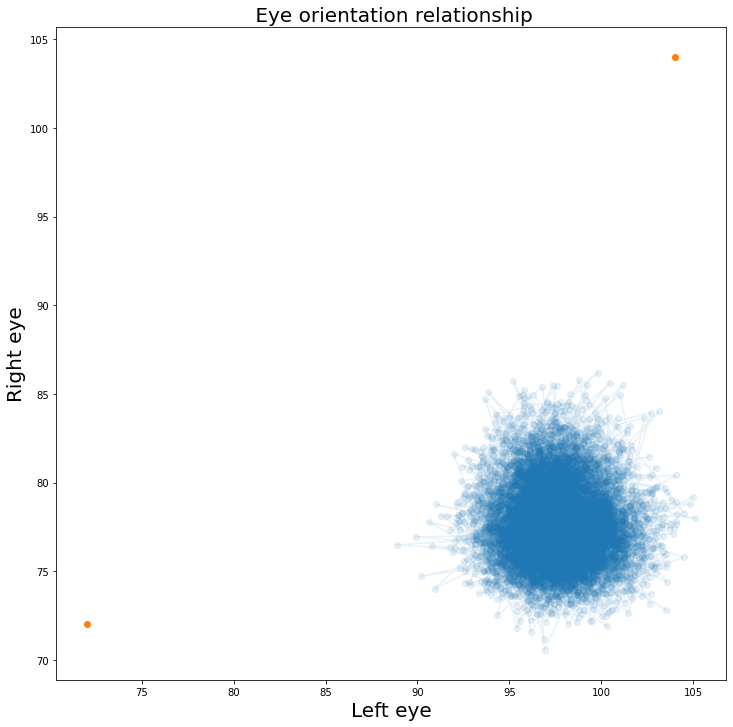

In [298]:
plt.rcParams["figure.figsize"] = (12, 12)

plt.scatter(tracking_pd['orientation_left_eye'], tracking_pd['orientation_right_eye'],alpha = 0.1)
plt.plot(tracking_pd['orientation_left_eye'], tracking_pd['orientation_right_eye'],alpha = 0.1)
plt.title(' Eye orientation relationship',size = 20)
plt.scatter([72,104],[72,104])
plt.xlabel('Left eye',size = 20)
plt.ylabel('Right eye',size = 20)

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        6.0000e+00, 6.0000e+00, 7.0000e+00, 3.0000e+00, 4.0000e+00,
        8.0000e+00, 5.0000e+00, 1.3095e+04, 3.8600e+02, 4.0600e+02,
        4.3900e+02, 4.2000e+02, 4.2800e+02, 3.9000e+02, 1.3060e+03,
        2.5000e+01, 2.2000e+01, 1.7000e+01, 2.0000e+01, 2.9000e+01,
        1.5700e+02, 1.2000e+01, 8.0000e+00, 1.2000e+01, 2.0000e+01,
        6.0000e+00, 9.0000e+00, 9.2000e+01, 5.0000e+00, 5.0000e+00,
        5.0000e+00, 2.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+01,
        5.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00, 4.0000e+00,
        2.0000e+00, 7.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 6.0000e+00, 0.0000e+00, 3.0000e+00,
        3.0000e+00, 0.0000e+00, 4.0000e+00, 1.0000e+00, 6.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 1.6000e+01, 2.0000e+00, 2.0000e+00, 2.0000e+00,
        3.0000e+00, 2.0000e+00, 1.0000e+00, 6.00

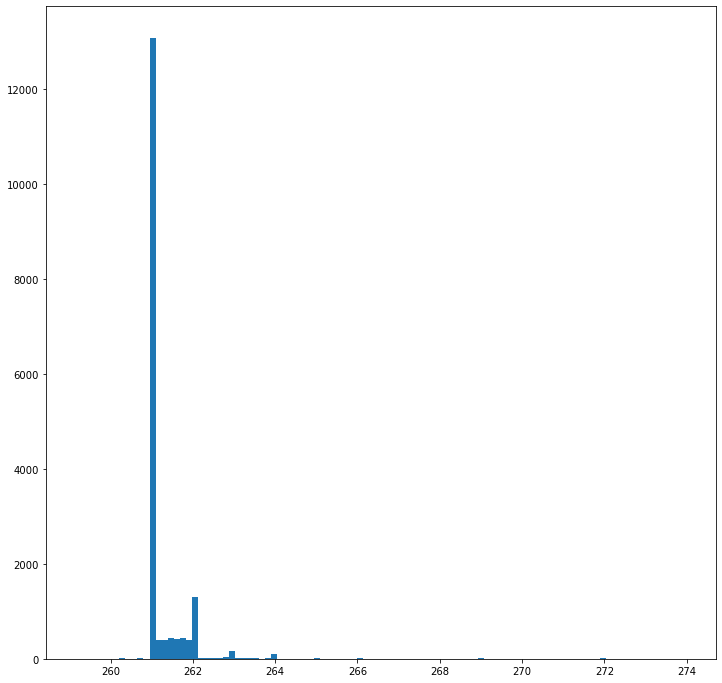

In [299]:
plt.hist(tracking_pd['tail_node_x03'], bins = 100)

(array([1598.,  772., 2175.,  679., 1026.,  285.,  496.,  141.,  113.,
          46.,  496.,  345., 1740.,  813.,  747.,  169.,  119.,   52.,
          81.,   40.,   54.,   37.,   55.,   22.,   46.,   21.,   27.,
          23.,   29.,   21.,   18.,   18.,   20.,   10.,   20.,   13.,
          24.,   14.,    8.]),
 array([255. , 255.5, 256. , 256.5, 257. , 257.5, 258. , 258.5, 259. ,
        259.5, 260. , 260.5, 261. , 261.5, 262. , 262.5, 263. , 263.5,
        264. , 264.5, 265. , 265.5, 266. , 266.5, 267. , 267.5, 268. ,
        268.5, 269. , 269.5, 270. , 270.5, 271. , 271.5, 272. , 272.5,
        273. , 273.5, 274. , 274.5]),
 <BarContainer object of 39 artists>)

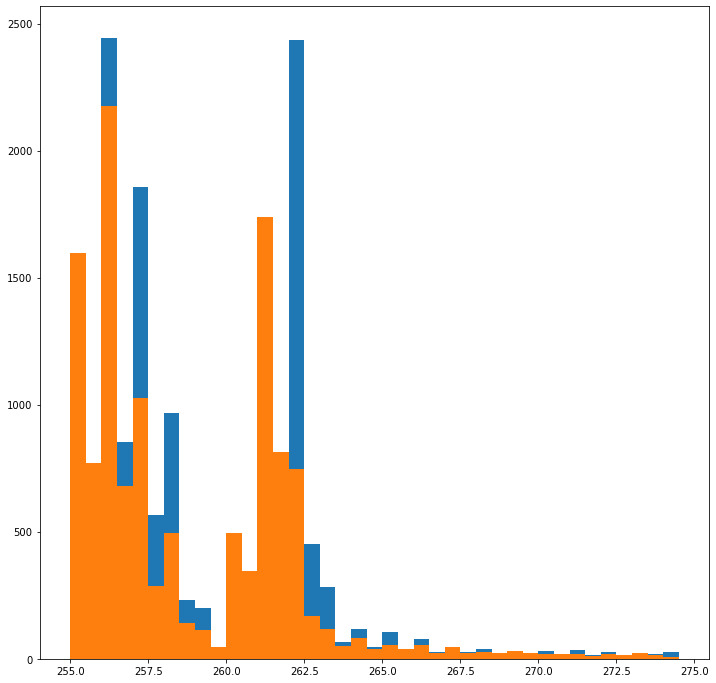

In [300]:
plt.hist(tracking_pd['tail_node_x23'], bins = np.arange(255,275,0.5))
plt.hist(tracking_pd['tail_node_x26'], bins = np.arange(255,275,0.5))


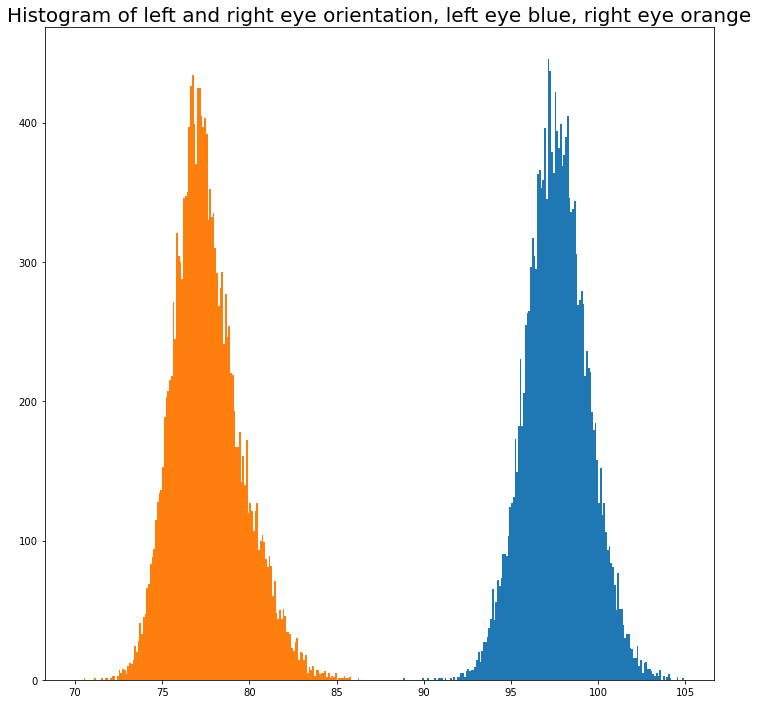

In [301]:
plt.hist(tracking_pd['orientation_left_eye'],bins = np.arange(70,105,0.1))
plt.hist(tracking_pd['orientation_right_eye'],bins = np.arange(70,105,0.1))
plt.title('Histogram of left and right eye orientation, left eye blue, right eye orange', size = 20)
plt.show()

In [109]:
tracking_p = tracking_pd[tracking_pd['time']>10]
tracking_p = tracking_p[tracking_p['time']<20]

trial_p = trial_pd[trial_pd['start_time']>10]
trial_p = trial_p[trial_p['start_time']<20]


In [303]:
trial_pd

,start_time,start_tail_tip_deflection,end_time,end_tail_tip_deflection,duration,estimated_orientation_change,interbout_interval,same_direction_as_previous_bout
0,11.122311,0.623741,11.942330,0.210424,0.820019,0.360838,45.772476,1.0
1,12.282338,1.162923,12.522343,0.157375,0.240005,-9.459417,0.340008,0.0
2,12.868065,2.008009,13.408078,0.247754,0.540012,-11.482451,0.345722,1.0
3,14.082379,0.538246,14.742394,0.245764,0.660015,-10.947071,0.674301,1.0
4,15.868134,0.518976,16.162426,0.227838,0.294292,-7.719741,1.125740,1.0
5,16.973874,0.664600,17.748177,0.237584,0.774303,-16.743003,0.811447,1.0
6,22.462571,0.687906,22.725434,0.152446,0.262863,-0.102141,4.714394,1.0
7,23.528309,0.596154,23.931176,0.239795,0.402866,-0.768862,0.802876,1.0
8,24.519761,1.267339,24.825482,0.246641,0.305721,-11.762044,0.588585,1.0
9,25.488354,0.573613,25.831219,0.152685,0.342865,-4.475175,0.662872,1.0


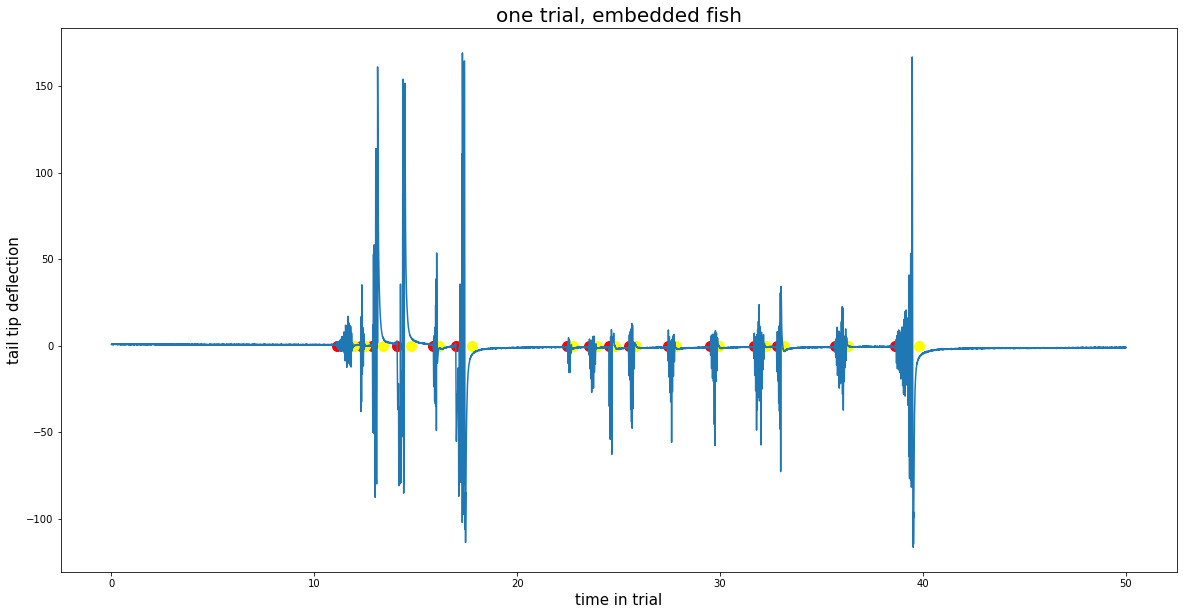

In [302]:

plt.rcParams["figure.figsize"] = (20, 10)

plt.plot(tracking_pd['time'], tracking_pd['tail_tip_deflection'])
plt.scatter(trial_pd['start_time'], np.zeros(len(trial_pd)), color='red', s=100)
plt.scatter(trial_pd['end_time'], np.zeros(len(trial_pd)), color='yellow', s=100)
#plt.plot([10,14.5],[2,2],color = 'green',linewidth = 0.2)
plt.title('one trial, embedded fish', size=20)
plt.xlabel('time in trial', size=15)
plt.ylabel('tail tip deflection', size=15)
plt.show()


In [313]:
trial_pd

,start_time,start_tail_tip_deflection,end_time,end_tail_tip_deflection,duration,estimated_orientation_change,interbout_interval,same_direction_as_previous_bout
0,11.122311,0.623741,11.942330,0.210424,0.820019,0.360838,45.772476,1.0
1,12.282338,1.162923,12.522343,0.157375,0.240005,-9.459417,0.340008,0.0
2,12.868065,2.008009,13.408078,0.247754,0.540012,-11.482451,0.345722,1.0
3,14.082379,0.538246,14.742394,0.245764,0.660015,-10.947071,0.674301,1.0
4,15.868134,0.518976,16.162426,0.227838,0.294292,-7.719741,1.125740,1.0
5,16.973874,0.664600,17.748177,0.237584,0.774303,-16.743003,0.811447,1.0
6,22.462571,0.687906,22.725434,0.152446,0.262863,-0.102141,4.714394,1.0
7,23.528309,0.596154,23.931176,0.239795,0.402866,-0.768862,0.802876,1.0
8,24.519761,1.267339,24.825482,0.246641,0.305721,-11.762044,0.588585,1.0
9,25.488354,0.573613,25.831219,0.152685,0.342865,-4.475175,0.662872,1.0


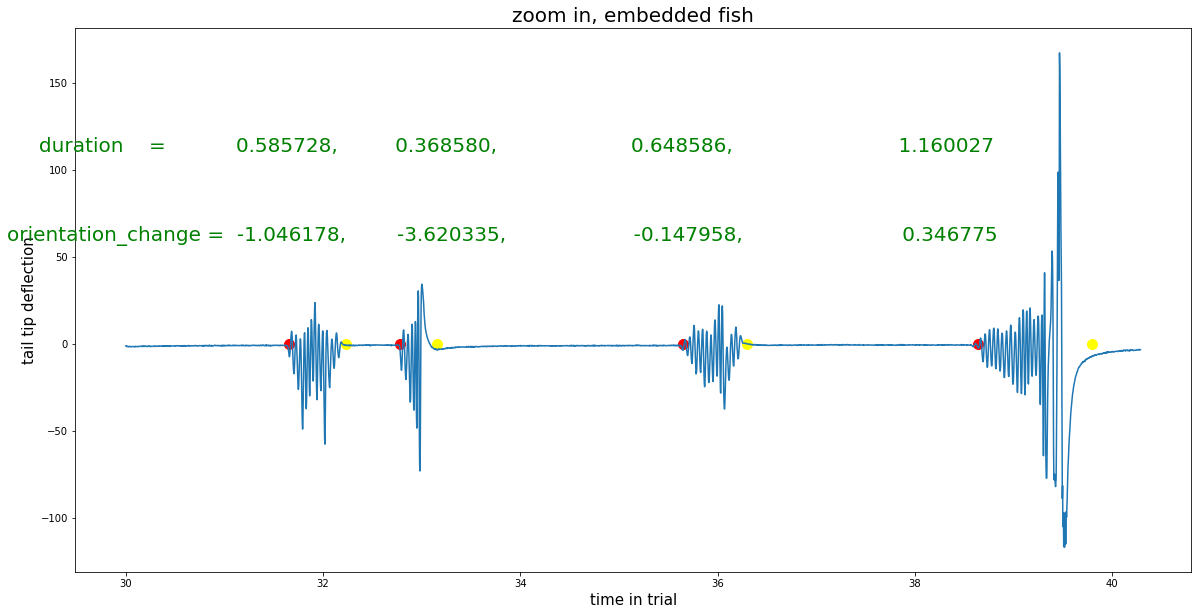

   estimated_orientation_change
0                      0.360838
1                     -9.459417
2                    -11.482451
3                    -10.947071
4                     -7.719741
5                    -16.743003
6                     -0.102141
7                     -0.768862
8                    -11.762044
9                     -4.475175
10                    -1.104902
11                    -0.441323
12                    -1.046178
13                    -3.620335
14                    -0.147958
15                     0.346775


In [321]:

plt.rcParams["figure.figsize"] = (20, 10)

plt.plot(tracking_pd['time'][10500:14100], tracking_pd['tail_tip_deflection'][10500:14100])
plt.scatter(trial_pd['start_time'][12:16], np.zeros(4), color='red', s=100)
plt.scatter(trial_pd['end_time'][12:16], np.zeros(4), color='yellow', s=100)
eq = 'orientation_change =  -1.046178,        -3.620335,                    -0.147958,                         0.346775'
d = '     duration    =           0.585728,         0.368580,                     0.648586,                          1.160027'
#plt.plot([10,14.5],[2,2],color = 'green',linewidth = 0.2)
plt.title('zoom in, embedded fish', size=20)
plt.xlabel('time in trial', size=15)
plt.ylabel('tail tip deflection', size=15)
plt.text(28.8, 110.18, d, {'color': 'green', 'fontsize': 20})
plt.text(28.8, 59.18, eq, {'color': 'green', 'fontsize': 20})

plt.show()
print(trial_pd['estimated_orientation_change'])

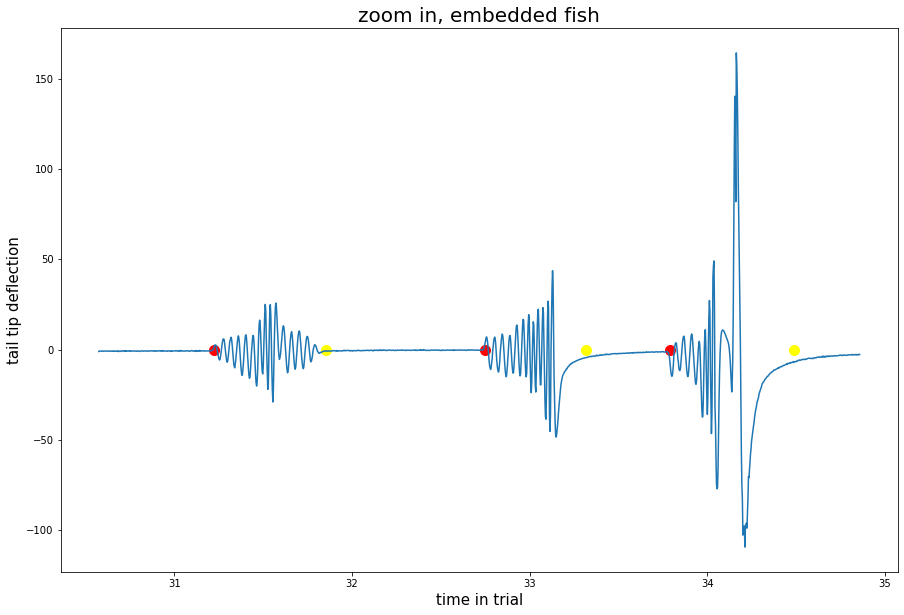

   estimated_orientation_change
0                     -0.124678
1                      0.222085
2                      3.587717
3                     -3.561902
4                     -3.665756
5                      0.889831
6                     -0.174666
7                    -14.386816
8                     -3.958009
9                     -0.308749
10                    -1.067746
11                    -0.961405
12                    -2.384811
13                    -1.122524
14                     0.230568
15                     0.589111
16                    -3.782510


In [203]:
plt.rcParams["figure.figsize"] = (15,10)

plt.plot(tracking_pd['time'][10700:12200],tracking_pd['tail_tip_deflection'][10700:12200])
plt.scatter(trial_pd['start_time'][14:17], np.zeros(3),color = 'red', s =100)
plt.scatter(trial_pd['end_time'][14:17], np.zeros(3),color = 'yellow', s = 100)
eq = 'ori_change = -0.124678 ,      0.282864,               3.587717'
d =  'duration    =  0.268578,         0.222085,              0.911449'
#plt.plot([10,14.5],[2,2],color = 'green',linewidth = 0.2)
plt.title('zoom in, embedded fish',size = 20)
plt.xlabel('time in trial',size = 15)
plt.ylabel('tail tip deflection',size = 15)
#plt.text(30.5, 10.18, eq, {'color': 'green', 'fontsize': 18})
#plt.text(30.5, 30.18, d, {'color': 'green', 'fontsize': 18})

plt.show()
print(trial_pd['estimated_orientation_change'])

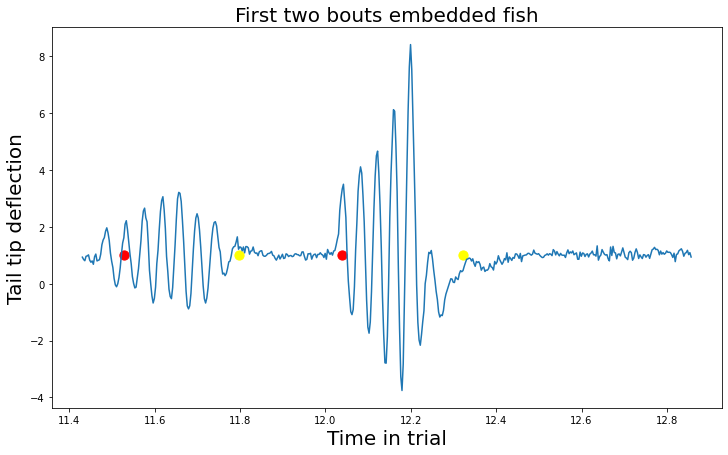

In [162]:
plt.rcParams["figure.figsize"] = (12,7)

plt.plot(tracking_pd['time'][4000:4500],tracking_pd['tail_tip_deflection'][4000:4500])
plt.scatter(trial_pd['start_time'][0:2], np.ones(2),color = 'red', s = 85)
plt.scatter(trial_pd['end_time'][0:2], np.ones(2),color = 'yellow', s = 85)
#plt.plot([11.5,12.5],[2,2],color = 'green')
plt.title('First two bouts embedded fish',size = 20)
plt.xlabel('Time in trial',size = 20)
plt.ylabel('Tail tip deflection',size = 20)
plt.show()

In [5]:
def access_raw(root_path):
    print('Accessing raw data...')
    df = pd.DataFrame()

    for fish_path in root_path.glob("*"):
        if not fish_path.is_dir():
           continue

        f_hdf5 = h5py.File(fish_path / f"{fish_path.name}.hdf5", "r")

        for key in f_hdf5.keys():
            if 'repeat' not in key:
                continue
            else:
                key = str(key)
                df_repeat = pd.DataFrame(f_hdf5[f"{key}/raw_data/tracking_data"],
                                 columns=f_hdf5[f"{key}/raw_data/tracking_data"].attrs["column_names"])

        for attr in list(f_hdf5.attrs):
            df_repeat[f'{attr}'] = f_hdf5.attrs.get(f'{attr}')

        df = pd.concat((df, df_repeat))
    df.set_index(list(f_hdf5.attrs),
         inplace=True)

    df.sort_index(inplace=True)

    print('Dataframe created')
    return df

In [6]:
path_to_input = r"C:\Users\ag-bahl\Desktop\temp_4dir"
path = Path(path_to_input)

In [68]:
def compile_all_fish(root_path):
    #For accessing all_bout_pandas
    df = pd.DataFrame()

    for fish_path in root_path.glob("*"):

        if not fish_path.is_dir():
            continue

        df_for_concat = pd.read_hdf(fish_path / f"{fish_path.name}.hdf5")

        df = pd.concat((df, df_for_concat))

    df.sort_index(inplace=True)

    return df

def get_any_data(root_path, outer_level, inner_level):

    if 'raw' in outer_level or 'raw' in inner_level:
        df = access_raw(root_path)

    elif outer_level == 'all_bout_data_pandas' or inner_level == 'all_bout_data_pandas':
        df = compile_all_fish(root_path)

    else:
        df = pd.DataFrame()

        print(f'Accessing {outer_level}/{inner_level} data...')

        for fish_path in root_path.glob("*"):
            if not fish_path.is_dir():
                continue

            f_hdf5 = h5py.File(fish_path / f"{fish_path.name}.hdf5", "r")

            for key in f_hdf5.keys():
                if 'repeat' not in key:
                    continue
                else:
                    key = str(key)
                    df_repeat = pd.DataFrame(f_hdf5[f"{key}/{outer_level}/{inner_level}"],
                                             columns=f_hdf5[f"{key}/{outer_level}/{inner_level}"].attrs["column_names"])

            for attr in list(f_hdf5.attrs):
                df_repeat[f'{attr}'] = f_hdf5.attrs.get(f'{attr}')

            df = pd.concat((df, df_repeat))

        df.set_index(list(f_hdf5.attrs),
                     inplace=True)

        df.sort_index(inplace=True)

        print(f'Dataframe {outer_level}/{inner_level} created')

    return df

In [69]:
bout = get_any_data(root_path = path, outer_level = 'all_bout_data_pandas', inner_level = 'all_bout_data_pandas')

In [7]:
df_raw = access_raw(path)

Accessing raw data...
Dataframe created


In [21]:
len(df_raw)/(24*60*60) # ka 3 vlera per sekond, tf?

184.785625

In [10]:
df_raw

time  \
arena_index experiment_comment experiment_time     fish_ID fish_age fish_comment fish_genotype fish_position_name folder_name                       setup_index                 
0           cool fish          2022-12-14_20-14-08 0       5                     WT            Upper left         2022-12-14_20-14-08_setup0_arena0 0            1.671045e+09   
                                                                                                                                                    0            1.671045e+09   
                                                                                                                                                    0            1.671045e+09   
                                                                                                                                                    0            1.671045e+09   
                                                                                                                                                    0            1.671045e+09   
...                                                                                                                                                                       ...   
                                                                                                                                                    0            1.671092e+09   
                                                                                                                                                    0            1.671092e+09   
                                                                                                                                                    0            1.671092e+09   
                                                                                                                                                    0            1.671092e+09   
                                                                                                                                                    0            1.671092e+09   

                                                                                                                                                                 orientation_left_eye  \
arena_index experiment_comment experiment_time     fish_ID fish_age fish_comment fish_genotype fish_position_name folder_name                       setup_index                         
0           cool fish          2022-12-14_20-14-08 0       5                     WT            Upper left         2022-12-14_20-14-08_setup0_arena0 0                       93.769348   
                                                                                                                                                    0                       95.802475   
                                                                                                                                                    0                       92.368927   
                                                                                                                                                    0                       90.893631   
                                                                                                                                                    0                       93.774902   
...                                                                                                                                                                               ...   
                                                                                                                                                    0                      100.211929   
                                                                                                                                                    0                       96.914185   
                 

In [42]:
df_raw['time'].max() - df_raw['time'].min()

46929.55576515198

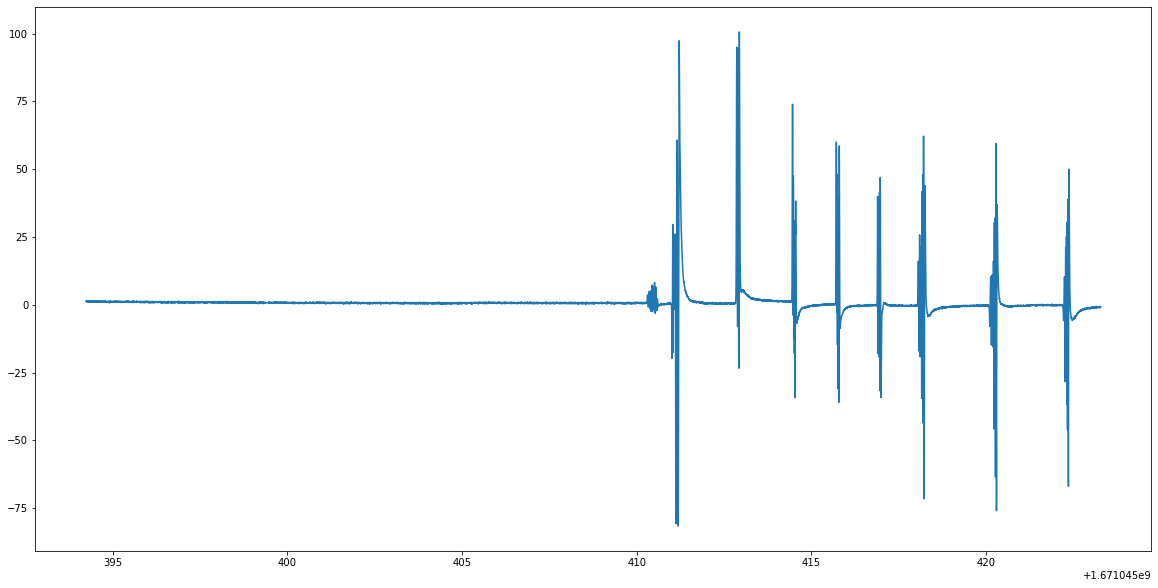

In [39]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(df_raw['time'][50000:60000],df_raw['tail_tip_deflection'][50000:60000])
plt.show()

In [45]:
df['trial'].value_counts()

151    49
126    42
142    39
132    37
17     35
       ..
148     2
177     1
200     1
106     1
168     1
Name: trial, Length: 190, dtype: int64

(array([152050., 161343.,  78856., 116053., 176780., 203987., 151427.,
        179612., 414817., 315055., 200383., 139195., 328294., 437351.,
        646312.,  54116., 384698., 412194., 484832., 314188., 281978.,
        769779., 482187., 137253., 331504., 480714., 542549., 215493.,
        367159., 351561., 245291., 165048., 218786., 324881., 240208.,
        112342., 147521., 186815., 126179.]),
 array([-1.0000000e+00, -9.5000000e-01, -9.0000000e-01, -8.5000000e-01,
        -8.0000000e-01, -7.5000000e-01, -7.0000000e-01, -6.5000000e-01,
        -6.0000000e-01, -5.5000000e-01, -5.0000000e-01, -4.5000000e-01,
        -4.0000000e-01, -3.5000000e-01, -3.0000000e-01, -2.5000000e-01,
        -2.0000000e-01, -1.5000000e-01, -1.0000000e-01, -5.0000000e-02,
         8.8817842e-16,  5.0000000e-02,  1.0000000e-01,  1.5000000e-01,
         2.0000000e-01,  2.5000000e-01,  3.0000000e-01,  3.5000000e-01,
         4.0000000e-01,  4.5000000e-01,  5.0000000e-01,  5.5000000e-01,
         6.0000000e-01,

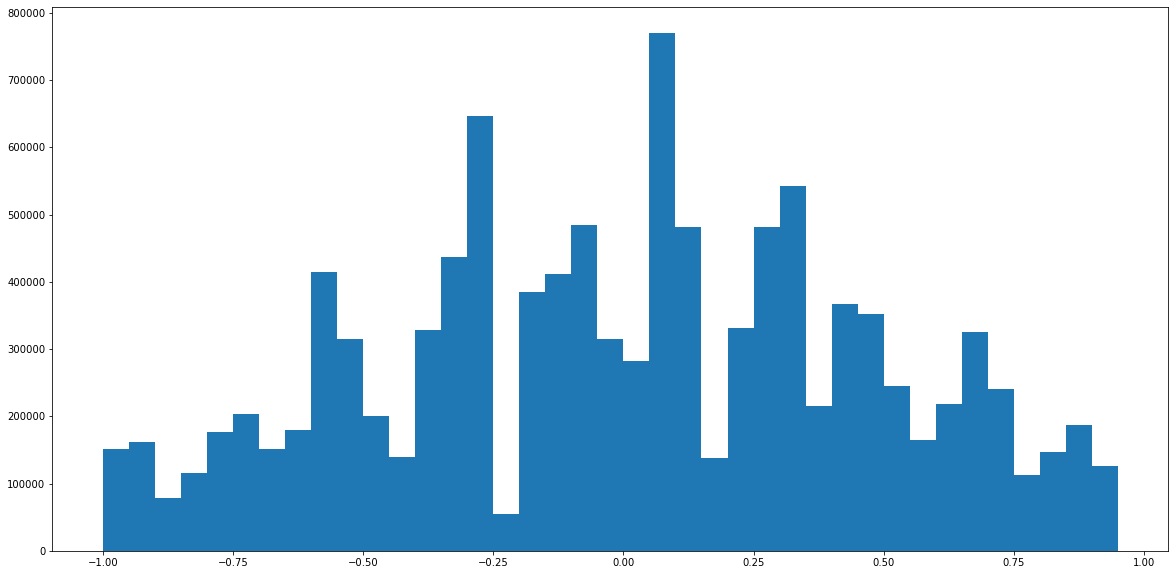

In [56]:
plt.hist(df_raw['tail_tip_deflection'],bins = np.arange(-1,1,0.05))

(array([36., 40., 44., 41., 38., 26., 29., 46., 51., 40., 53., 38., 23.,
        30., 50., 39., 33., 32., 25.]),
 array([-5.00000000e-01, -4.50000000e-01, -4.00000000e-01, -3.50000000e-01,
        -3.00000000e-01, -2.50000000e-01, -2.00000000e-01, -1.50000000e-01,
        -1.00000000e-01, -5.00000000e-02, -1.11022302e-16,  5.00000000e-02,
         1.00000000e-01,  1.50000000e-01,  2.00000000e-01,  2.50000000e-01,
         3.00000000e-01,  3.50000000e-01,  4.00000000e-01,  4.50000000e-01]),
 <BarContainer object of 19 artists>)

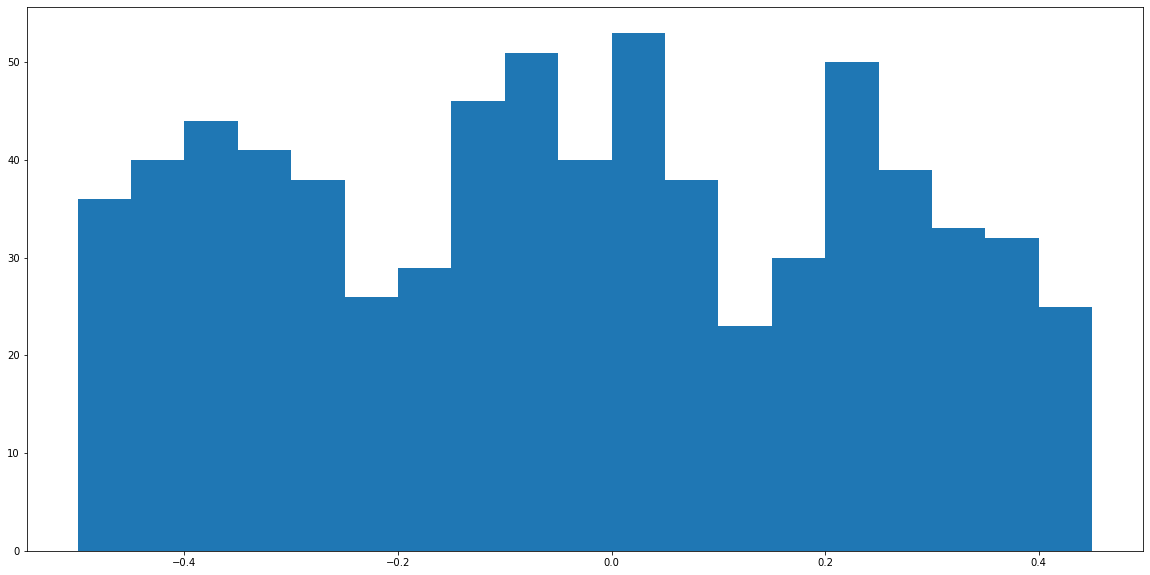

In [62]:
plt.hist(df['estimated_orientation_change'],bins = np.arange(-0.5,0.5,0.05))

In [12]:
df["stimulus_name"].unique().tolist()

['motion_leftward',
 'motion_rightward',
 'motion_forward',
 'motion_backward',
 'gray']

Text(0.5, 1.0, 'embedded fish 24 hour data, histogram of estimated orientation change')

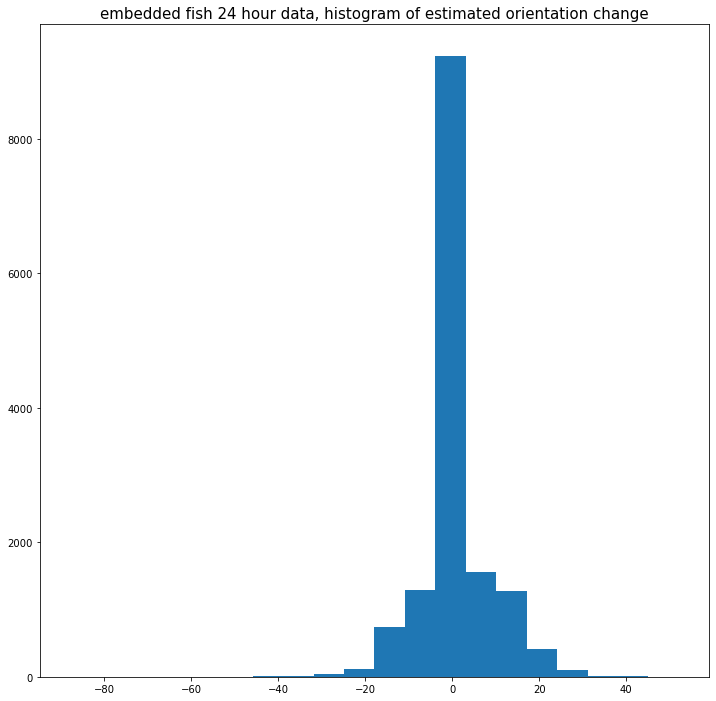

In [40]:
plt.hist(df['estimated_orientation_change'],bins = 20)
plt.title('embedded fish 24 hour data, histogram of estimated orientation change',size = 15)


In [24]:
df_cols = df.columns.tolist()
df_cols

['index',
 'setup_index',
 'arena_index',
 'experiment_repeat',
 'fish_ID',
 'folder_name',
 'fish_genotype',
 'fish_age',
 'stimulus_name',
 'trial',
 'start_time',
 'start_tail_tip_deflection',
 'end_time',
 'end_tail_tip_deflection',
 'duration',
 'estimated_orientation_change',
 'interbout_interval',
 'same_direction_as_previous_bout',
 'start_time_absolute',
 'end_time_absolute',
 'estimated_orientation_change_flipped',
 'time',
 'left_bouts',
 'right_bouts',
 'straight_bouts',
 'bout_orientation',
 'bout_orientation_absolute',
 'left_bouts_absolute',
 'right_bouts_absolute',
 'binned_time']

In [42]:
len(df)/(4*24*60) # a fish did 2.5 tail flips per minute on average

2.5713541666666666

In [27]:
print(len(df))
df2=df.dropna(axis=0)
print(len(df2))


14811
14808


,index,setup_index,arena_index,experiment_repeat,fish_ID,folder_name,fish_genotype,fish_age,stimulus_name,trial,...,estimated_orientation_change_flipped,time,left_bouts,right_bouts,straight_bouts,bout_orientation,bout_orientation_absolute,left_bouts_absolute,right_bouts_absolute,binned_time
1,1,0,0,0,0,2022-12-14_20-14-08_setup0_arena0,WT,5,motion_leftward,0,...,-6.241561,15.868256,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,15.5
2,2,0,0,0,0,2022-12-14_20-14-08_setup0_arena0,WT,5,motion_leftward,0,...,0.057477,16.899708,0.0,0.0,1.0,0.0,1.0,1.0,0.0,16.5
3,3,0,0,0,0,2022-12-14_20-14-08_setup0_arena0,WT,5,motion_leftward,0,...,16.345433,17.774014,1.0,0.0,0.0,1.0,1.0,1.0,0.0,17.5
4,4,0,0,0,0,2022-12-14_20-14-08_setup0_arena0,WT,5,motion_rightward,0,...,-12.170412,15.000067,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,15.5
5,5,0,0,0,0,2022-12-14_20-14-08_setup0_arena0,WT,5,motion_rightward,0,...,-23.035729,16.368670,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14806,14806,0,5,0,2,2022-12-14_20-14-08_setup0_arena5,WT,5,motion_rightward,186,...,0.930875,44.878753,0.0,0.0,1.0,0.0,1.0,1.0,0.0,44.5
14807,14807,0,5,0,2,2022-12-14_20-14-08_setup0_arena5,WT,5,motion_rightward,186,...,-0.771077,45.624484,0.0,0.0,1.0,0.0,-1.0,0.0,1.0,45.5
14808,14808,0,5,0,2,2022-12-14_20-14-08_setup0_arena5,WT,5,motion_rightward,186,...,10.028995,47.561671,1.0,0.0,0.0,1.0,1.0,1.0,0.0,47.5
14809,14809,0,5,0,2,2022-12-14_20-14-08_setup0_arena5,WT,5,gray,181,...,-9.819926,47.847504,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,47.5


In [28]:
def bin_data(label_df, bin_size = 1): # why did i add name_of_data here???
    time_index = label_df['time']
    label_df['binned_time'] = time_index - time_index % bin_size + bin_size / 2
    label_df = label_df.reset_index()
    bin_df = label_df.groupby(['fish_ID', 'stimulus_name', 'binned_time']).sum()
    bin_df['total_bouts'] = bin_df.left_bouts + bin_df.right_bouts + bin_df.straight_bouts
    #Analysed part:
    bin_df['preference_index'] = (bin_df.left_bouts - (bin_df.right_bouts + bin_df.straight_bouts))/bin_df.total_bouts
    bin_df['percentage_left'] = (bin_df.left_bouts / bin_df.total_bouts)*100
    bin_df['percentage_right'] = (bin_df.left_bouts / bin_df.total_bouts)*100
    bin_df['percentage_straight'] = (bin_df.left_bouts / bin_df.total_bouts)*100
   # bin_df['left_bouts_absolute'] = (bin_df.left_bouts_absolute / bin_df.total_bouts)*100
   # bin_df['right_bouts_absolute'] = (bin_df.right_bouts_absolute / bin_df.total_bouts)*100
   # bin_df.to_csv(r"C:\Users\ag-bahl\Desktop\dataframes\binned_df"+str(name_of_data)+".csv")
    return bin_df
bin_df = bin_data(df, bin_size = 1)

In [36]:
def plot_pref(bin_df, pref='preference_index', time_marker=None,plot_together = True):
    num_fish = len(bin_df.index.unique('fish_ID'))
    t_stamp = bin_df.index.unique('binned_time')
    bin_df = bin_df.reset_index()

    mean_df = bin_df.groupby(['stimulus_name', 'binned_time']).mean()
    sem_df = bin_df.groupby(['stimulus_name', 'binned_time']).std() / (num_fish) ** 0.5
    if plot_together == True:
        legend = []
    colors = ['red','purple','cyan','green','orange','blue','pink','brown','violet','red','cyan']
 #   for variable in
    iterate = mean_df.index.unique('stimulus_name')
    for stim in range(len(iterate)):
        if plot_together == True:
            legend.append(str(iterate[stim]))
        else:
            legend = [str(iterate[stim])]
        plot_mean_df = mean_df.xs(iterate[stim], level='stimulus_name')
        plot_sem_df = sem_df.xs(iterate[stim], level='stimulus_name')

        plt.plot(plot_mean_df.preference_index, marker='o', linewidth=1, markersize=2,color = colors[stim])
      #  plt.fill_between(t_stamp, plot_mean_df.preference_index + plot_sem_df.preference_index,
       #                  plot_mean_df.preference_index - plot_sem_df.preference_index,
        #                 alpha=0.25, label='_no_legend_',color = colors[stim])


     #   plt.legend(legend)
     #   plt.show()
    if time_marker != None:
        for t in time_marker:
            plt.axvline(x=t, color='grey', linestyle='--', alpha=0.4, label='_nolegend_')
    plt.plot([0,0],[-1,1], color = 'blue')
    plt.legend(legend)
    plt.title('Sine gratings 8 directions',size = 20)
    plt.xlabel('Time (seconds)', size = 20)
    plt.ylabel('Orientation', size = 20)
    plt.show()

    return plt


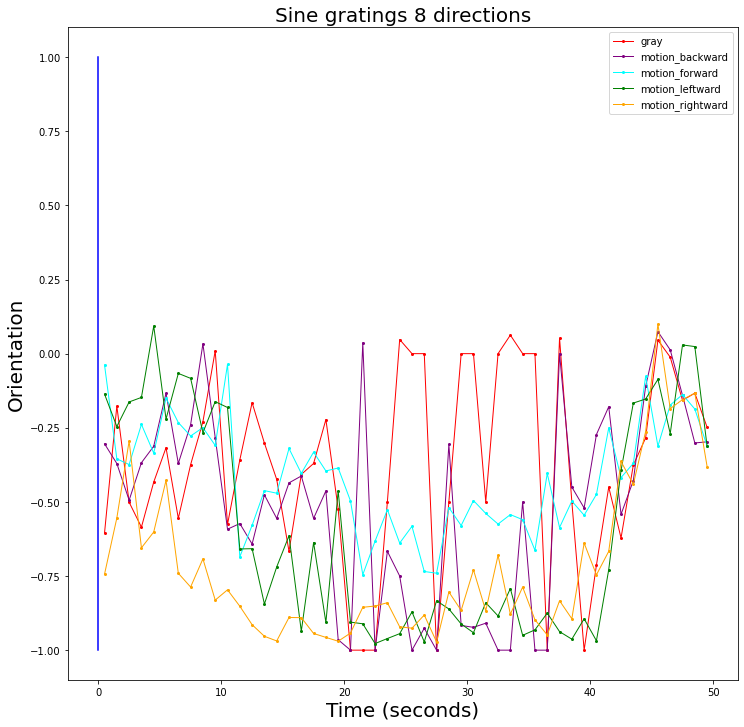

<module 'matplotlib.pyplot' from 'C:\\Users\\ag-bahl\\anaconda3\\envs\\py39\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [37]:
plt.rcParams["figure.figsize"] = (12,12)

plot_pref(bin_df, pref='preference_index', time_marker=None,plot_together = True)